In [41]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [42]:
link_img = './anhconan.jpg'

**E1**

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

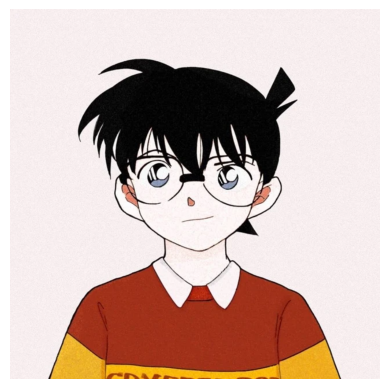

In [43]:
img = cv2.imread(link_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

**E2**

image Dimension =(320, 640, 4)


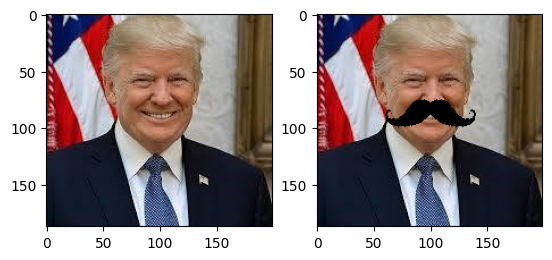

In [45]:
faceImage = cv2.imread('trump.jpg')
# Tải hình ảnh ria mép bằng kênh Alpha
moustache = cv2.imread('Moustache.png', -1)
print("image Dimension ={}".format(moustache.shape))
# Tách kênh Màu và kênh Alpha
moustacheBGR = moustache[:,:,0:3]
moustacheMask1 = moustache[:,:,3]


# faceImage là hình ảnh màu 3 kênh, chúng ta cần hình ảnh 3 kênh cho mặt nạ
moustacheMask = cv2.merge((moustacheMask1,moustacheMask1,moustacheMask1))
# Tạo các giá trị [0,1] vì chúng ta đang sử dụng các phép toán số học
moustacheMask = np.uint8(moustacheMask/255)
face = faceImage.copy()
# Lấy vùng mũi-môi từ hình ảnh khuôn mặt
roi = face[65:110,60:140]

# Thay đổi kích thước moustacheMask để phù hợp với kích thước của roi
moustacheMask = cv2.resize(moustacheMask, (roi.shape[1], roi.shape[0]))

# Sử dụng mặt nạ để tạo vùng roi có mặt nạ
maskedRoi = cv2.multiply(roi,(1- moustacheMask))
#Sử dụng mặt nạ để tạo vùng ria mép có mặt nạ
maskedMoustache = cv2.multiply(cv2.resize(moustacheBGR, (roi.shape[1], roi.shape[0])), moustacheMask) # Resize moustache too

# Combine the moustache in the nose-lip region to get the enhanced image
nose_lip_final = cv2.add(maskedRoi, maskedMoustache)
face[65:110,60:140] = nose_lip_final
plt.figure()
plt.subplot(121); plt.imshow(faceImage[:,:,::-1])
plt.subplot(122); plt.imshow(face[:,:,::-1])
plt.show()

**E3**

(np.float64(-0.5), np.float64(3999.5), np.float64(2666.5), np.float64(-0.5))

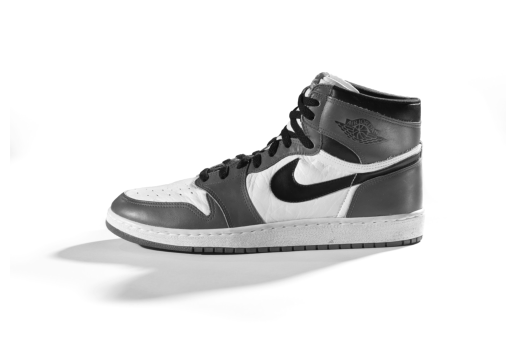

In [47]:
# Read the input color image “shoes.jpg” in variable bgrImg, convert it into a grayscale image grayImg and display it
grayImg = cv2.imread('shoes.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(grayImg, cmap='gray')
plt.axis('off')

Original Dimensions :  (2667, 4000)
Resized Dimensions :  (1333, 2000)


(np.float64(-0.5), np.float64(1999.5), np.float64(1332.5), np.float64(-0.5))

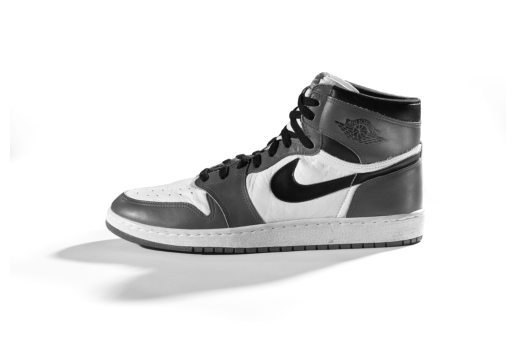

In [50]:
# Resize grayImg to have half pixels per horizontal and vertical coordinates, then display the resized image. Use the function cv2.resize
width, height = grayImg.shape
new_width = width//2
new_height = height//2

resizedImg = cv2.resize(grayImg, (new_height, new_width))
print('Original Dimensions : ',grayImg.shape)
print('Resized Dimensions : ',resizedImg.shape)
plt.imshow(resizedImg, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(2666.5), np.float64(3999.5), np.float64(-0.5))

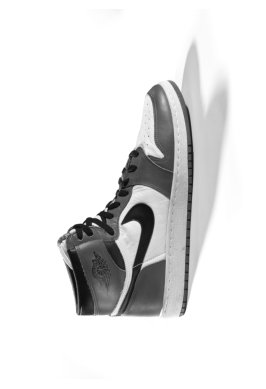

In [51]:
# Display the transposed matrix of grayImg. Use the function cv2.transpose.
trans_img = cv2.transpose(grayImg)
plt.imshow(trans_img, cmap='gray')
plt.axis('off')

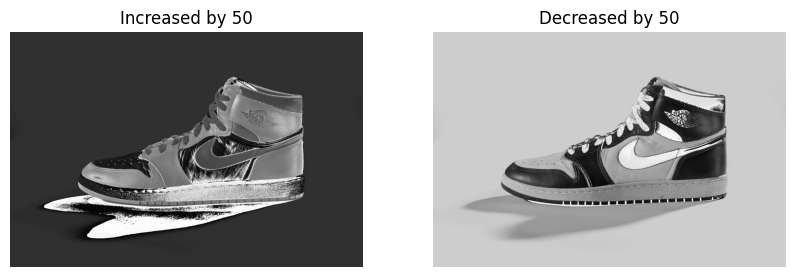

In [55]:
# Increase by 50 the intensity in grayImg, then decrease the intensity by 50. Display both output images and comment on the results
increased_img = grayImg + 50
decreased_img = grayImg - 50
plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(increased_img, cmap='gray'); plt.title('Increased by 50');plt.axis('off')
plt.subplot(122); plt.imshow(decreased_img, cmap='gray'); plt.title('Decreased by 50');plt.axis('off')
plt.show()


(np.float64(-0.5), np.float64(3999.5), np.float64(2666.5), np.float64(-0.5))

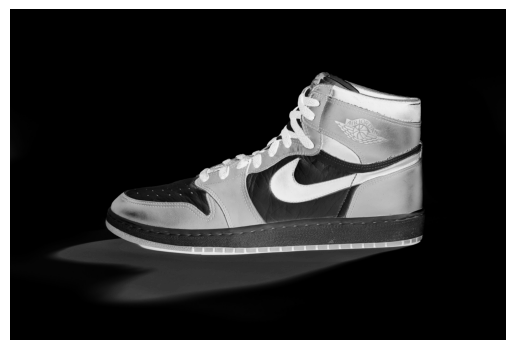

In [57]:
# Generate and display the negative of grayImg.
negative_img = 255 - grayImg
plt.imshow(negative_img, cmap='gray')
plt.axis('off')

In [58]:
# Save one of the previous output images in JPEG format with a quality factor of 80.
cv2.imwrite('output.jpg', negative_img, [int(cv2.IMWRITE_JPEG_QUALITY), 80])

True

**E4**

In [59]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['image.interpolation'] = 'bilinear'

(np.float64(-0.5), np.float64(3999.5), np.float64(2666.5), np.float64(-0.5))

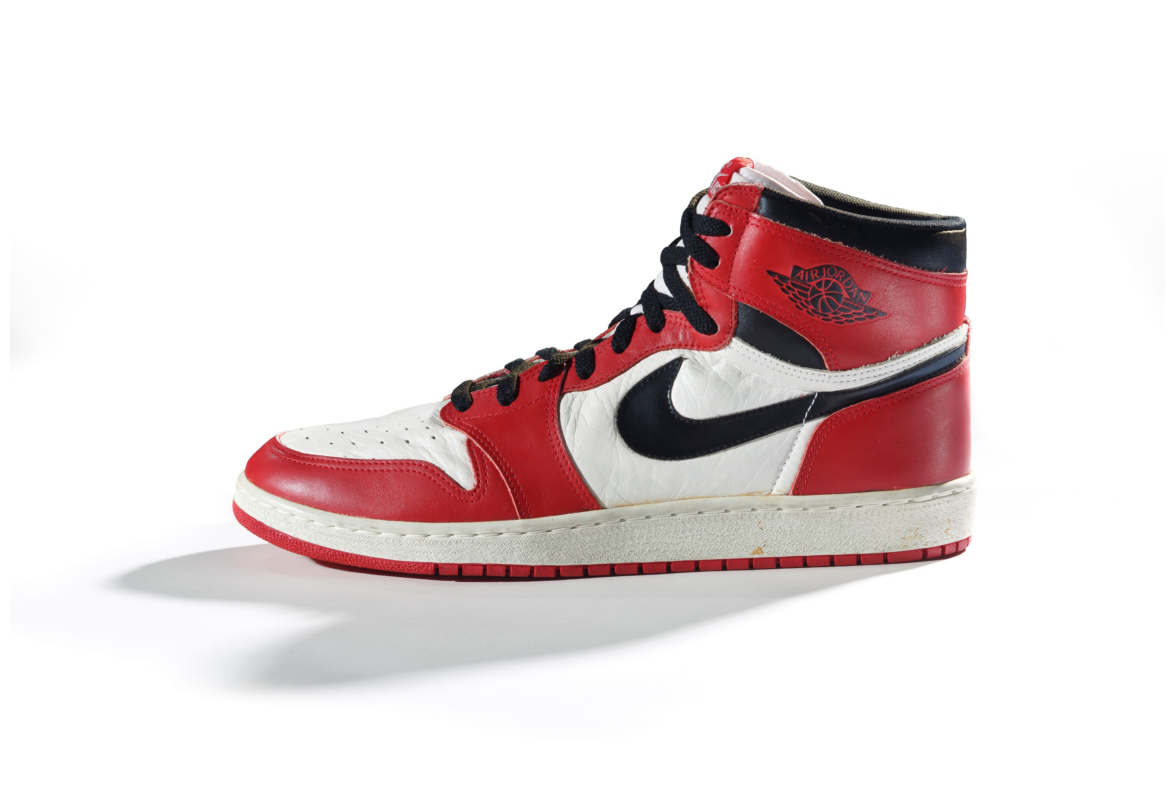

In [60]:
bgrImage = cv2.imread('shoes.jpg')
plt.figure(figsize=[20,10])
plt.imshow(bgrImage [...,::-1])
plt.axis('off')

In [61]:
hsvImage = cv2.cvtColor(bgrImage,cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsvImage)
print(H.shape)


(2667, 4000)


In [62]:
H_array = H[S > 10].flatten()
print(H_array.shape)

(1832190,)


Text(0.5, 1.0, 'Histogram')

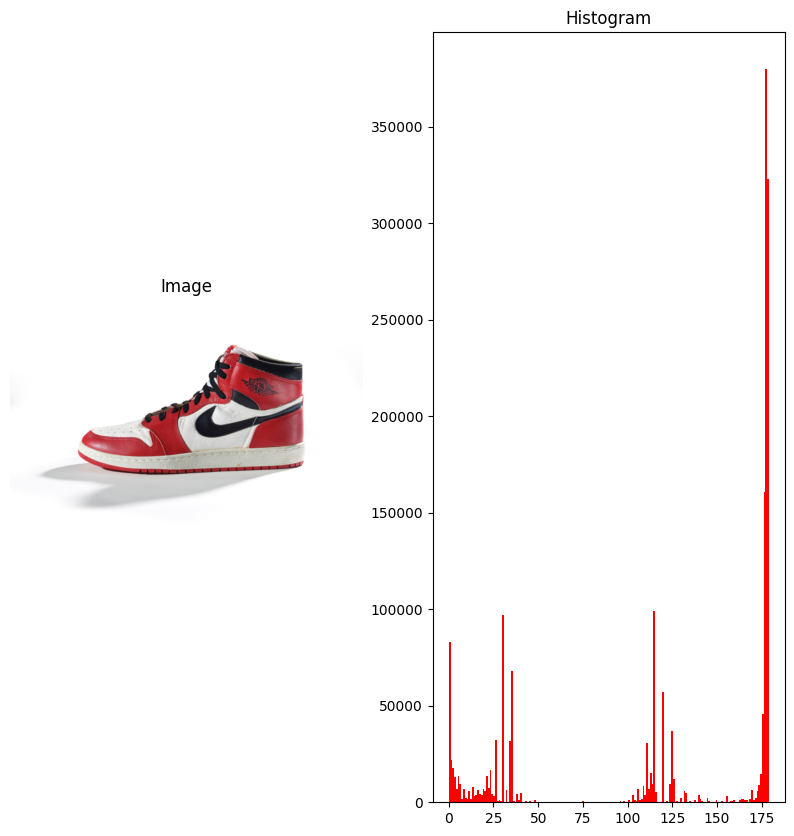

In [63]:
plt.figure()
plt.subplot(121);plt.imshow(bgrImage [...,::-1]);
plt.title("Image"); plt.axis('off')
plt.subplot(122);plt.hist(H_array, bins=180, color='r');plt.title("Histogram")

**E5**